# Zachary Brunet
## Research Questions and Interests
##### Mental health in the workplace is rapidly becoming a more common topic, and knowing what factors may cause employee attrition is good for anyone to know. We are interested in this dataset because we want to understand the leading factors that lead to employee attrition and more importantly, how we could use that to our benefit. What point does an employee begin to be dissatisfied with their workplace? Are people who jump around from company to company more satisfied than people who stay long term?

##### "How does age influence attrition? Already can see that on average younger people have attrition while older people do not. Is it because of how long they have been at a company? If they have advanced through promotions?"
##### "What impact does location of employee have? Changing locations, travelling, distance from work, is it better to stay in one place or move around?"

##### Heatmap to create correlation matrix, can see some correlations between different items that have potential interest. Positive ones (that are higher numbered, are ones to look out for. For example, JobLevel, MonthlyIncome, and TotalWorkingYears all have correlations to eachother, which makes sense. The longer you work the higher your position and the more you get paid.

##### From the averages functions we saw that people who were younger, worked fewer years, were paid less, and worked farther from work, all were typically more likely to face attrition at their workplace. This was interesting to me as it raises the question of, is there a gap between the older and younger generations? Are younger people more unhappy with workplace conditions  compared to older people? Or is it because older people are more settled in their jobs and have acclimated to the issues that may face their younger counterparts?

## Task 1

#### Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")

#### Basic Info

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df.head()
#top few rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df.columns
#list of all of the columns in the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df.nunique(axis=0)
#the amount of different unique values for each column

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#some simple calculations taken from each column, basic essentials. Can see that StandardHours, EmployeeNumber, EmployeeCount, and Over18 are values
#that replicate over and over, that aren't useful and so in the future can delete these columns.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.000000,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.000000,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.000000,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.000000,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df_cleaned = df.copy()
df_cleaned = df_cleaned.copy().drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],axis=1)
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Analysis Between Variables

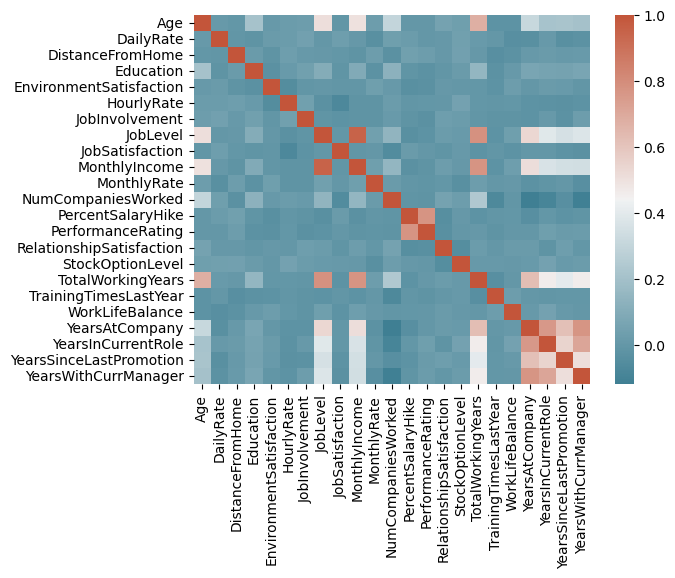

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df_cleaned = df.copy()
df_cleaned = df_cleaned.copy().drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],axis=1)
df_cleaned.head()
corr = df_cleaned.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, annot = False, cmap = sns.diverging_palette(220,20,as_cmap=True))
#Heatmap to create correlation matrix, can see some correlations between different items that have potential interest. Positive ones (that are higher
#numbered, are ones to look out for. For example, JobLevel, MonthlyIncome, and TotalWorkingYears all have correlations to eachother, which makes sense.
#The longer you work the higher your position and the more you get paid.
plt.savefig("../images/2_2.png")


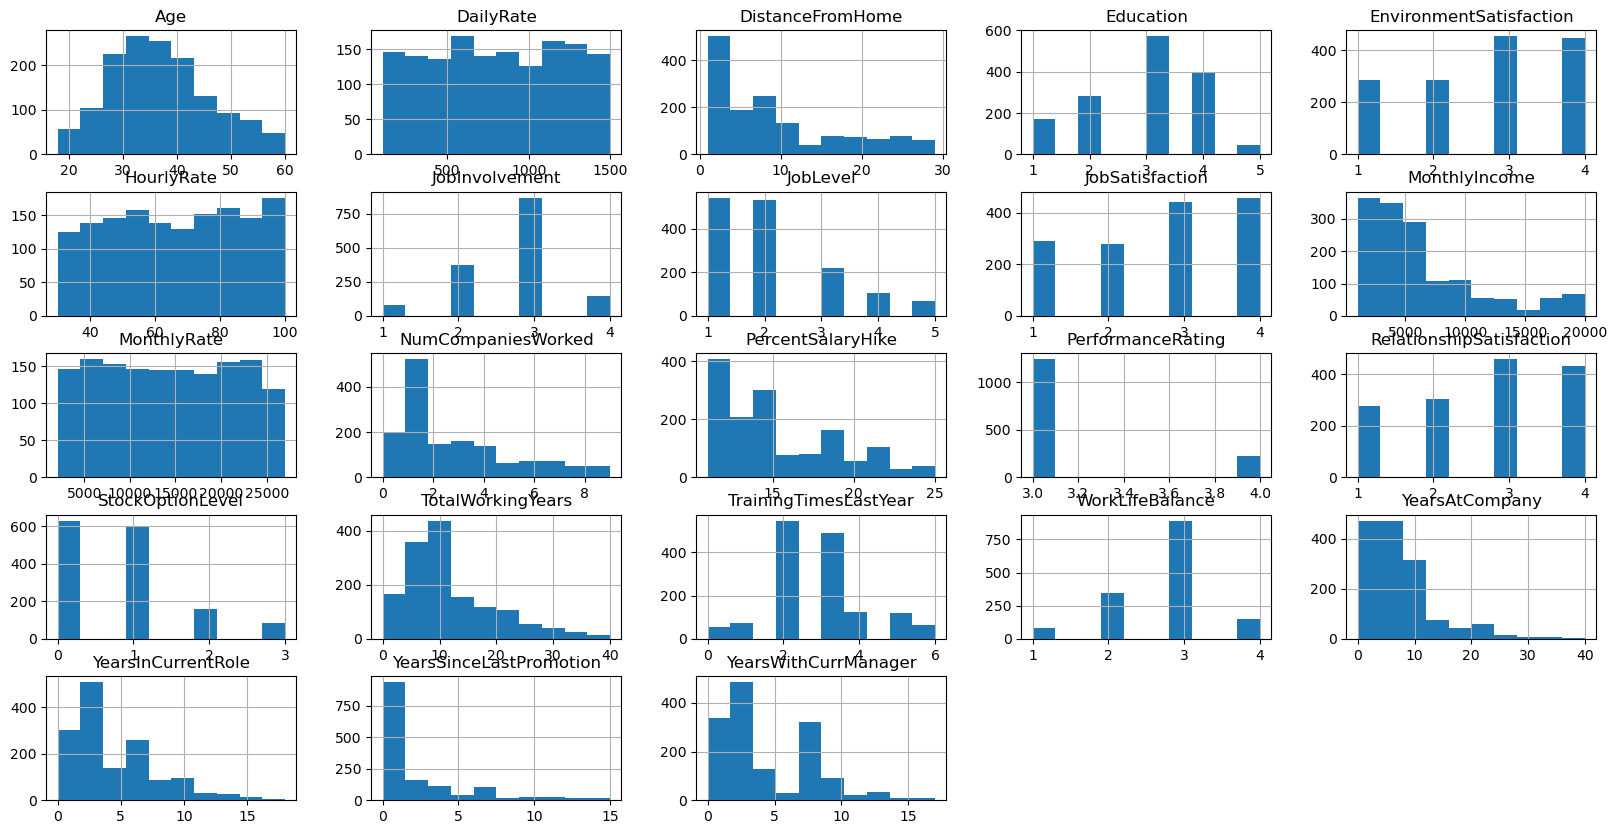

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df_cleaned = df.copy()
df_cleaned = df_cleaned.copy().drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],axis=1)
df_cleaned.head()

hist = df_cleaned.hist(bins = 10,figsize = (20,10))
plt.savefig("../images/2_1.png")


## Task 2 and 3

Averages of people with attrition
TotalWorkingYears          8.244726
YearsAtCompany             5.130802
YearsInCurrentRole         2.902954
YearsSinceLastPromotion    1.945148
dtype: float64


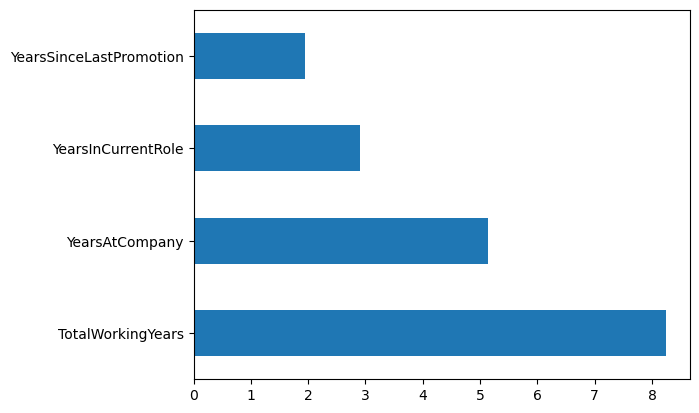

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df_cleaned = df.copy()
df_cleaned = df_cleaned.copy().drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],axis=1)

df2 = df_cleaned.loc[df_cleaned['Attrition'] == 'Yes']

col = ['Age','DailyRate','DistanceFromHome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
col2 = ['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
df4 = df2[col2].mean()
print("Averages of people with attrition")
print(df4)


ax = df4.plot.barh()
plt.savefig("../images/2_3.png")


Averages of people without attrition
TotalWorkingYears          11.862936
YearsAtCompany              7.369019
YearsInCurrentRole          4.484185
YearsSinceLastPromotion     2.234388
dtype: float64


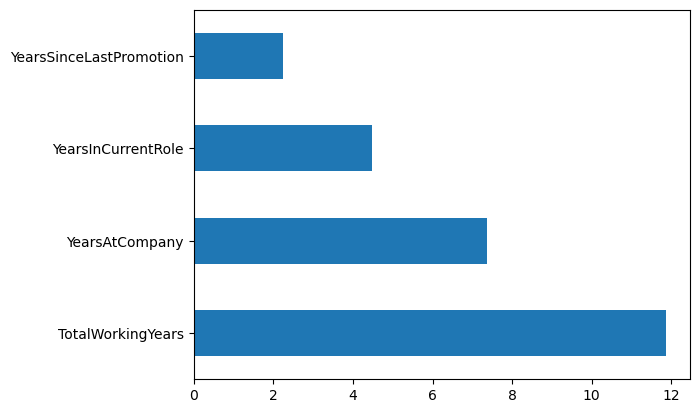

In [31]:
df = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
df_cleaned = df.copy()
df_cleaned = df_cleaned.copy().drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],axis=1)

df3 = df_cleaned.loc[df_cleaned['Attrition'] == 'No']
col2 = ['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
print("Averages of people without attrition")
print(df5)
ax = df5.plot.barh()
plt.savefig("../images/2_4.png")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from projectfunctions2 import *
df = load_and_process("../data/raw/HR-Employee-Attrition.csv")
FirstEda(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   category
 13  JobRole                   1470 non-null   catego

None

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome Education EducationFie

(1470, 31)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

Averages of people with attrition
Age                         33.607595
DailyRate                  750.362869
DistanceFromHome            10.632911
TotalWorkingYears            8.244726
YearsAtCompany               5.130802
YearsInCurrentRole           2.902954
YearsSinceLastPromotion      1.945148
dtype: float64
Averages of people without attrition
Age                         37.561233
DailyRate                  812.504461
DistanceFromHome             8.915653
TotalWorkingYears           11.862936
YearsAtCompany               7.369019
YearsInCurrentRole           4.484185
YearsSinceLastPromotion      2.234388
dtype: float64


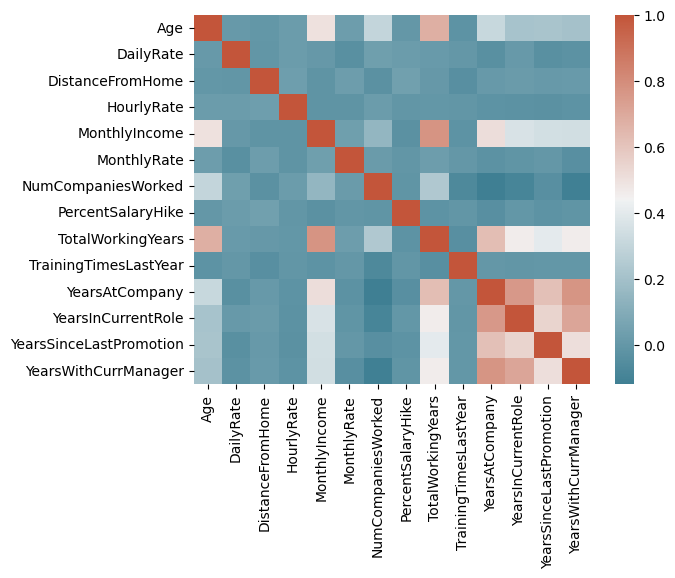

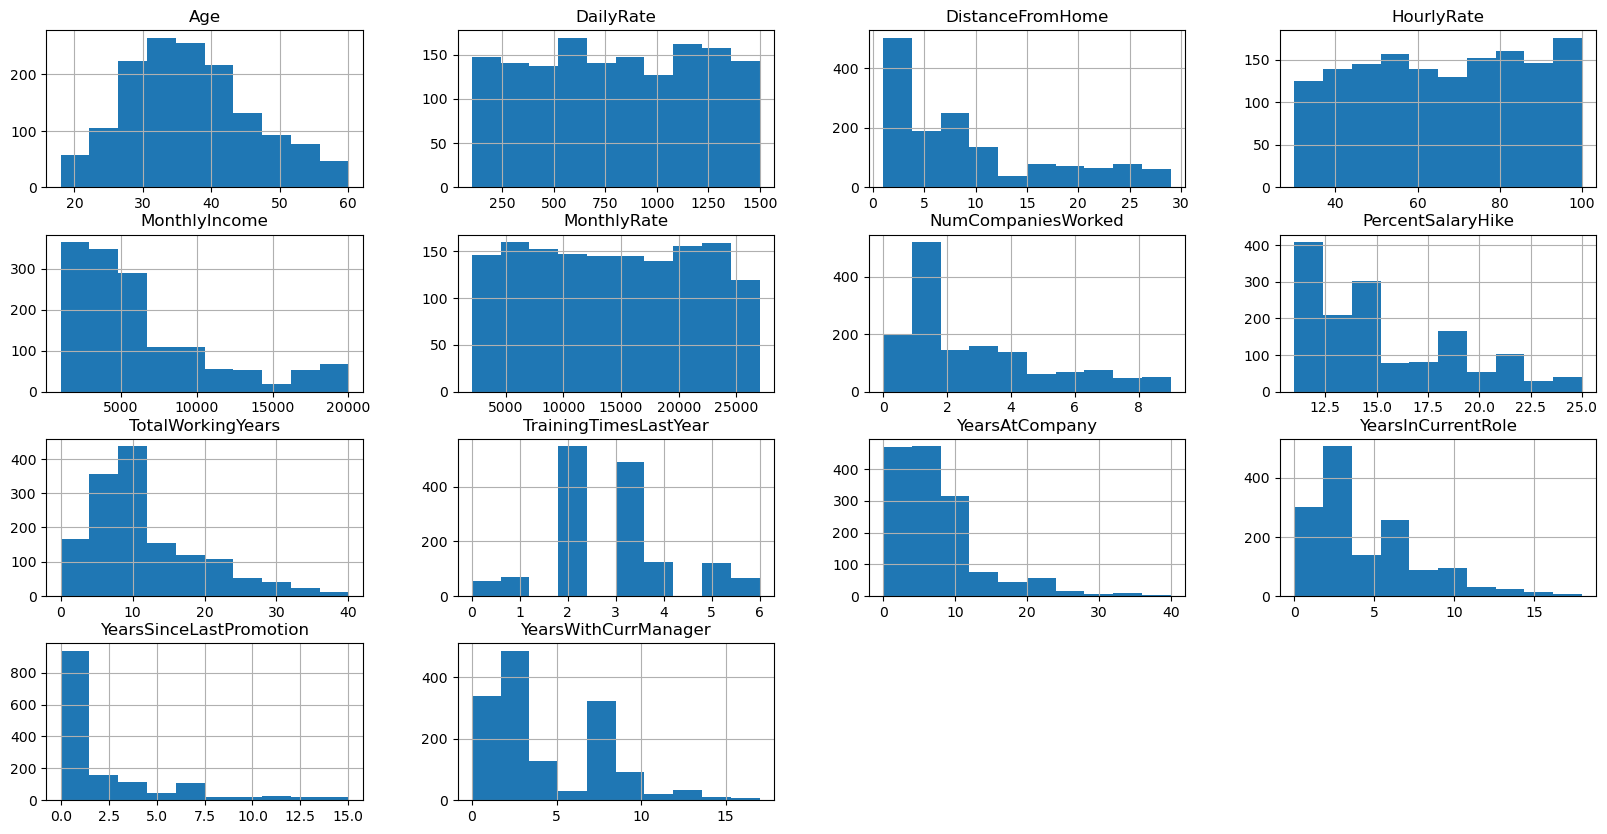

In [4]:
SecondEda(df)